In [1]:
import pandas as pd

In [2]:
# Create a dataframe with dates as your index
States = ['NY', 'NY', 'NY', 'NY', 'FL', 'FL', 'GA', 'GA', 'FL', 'FL'] 
data = [1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
idx = pd.date_range('1/1/2012', periods=10, freq='MS')
df1 = pd.DataFrame(data, index=idx, columns=['Revenue'])
df1['State'] = States

# Create a second dataframe
data2 = [10.0, 10.0, 9, 9, 8, 8, 7, 7, 6, 6]
idx2 = pd.date_range('1/1/2013', periods=10, freq='MS')
df2 = pd.DataFrame(data2, index=idx2, columns=['Revenue'])
df2['State'] = States

In [3]:
# Combine dataframes
df = pd.concat([df1,df2])
df

,Revenue,State
2012-01-01,1.0,NY
2012-02-01,2.0,NY
2012-03-01,3.0,NY
2012-04-01,4.0,NY
2012-05-01,5.0,FL
2012-06-01,6.0,FL
2012-07-01,7.0,GA
2012-08-01,8.0,GA
2012-09-01,9.0,FL
2012-10-01,10.0,FL


In [4]:
# Method 1

# make a copy of original df
newdf = df.copy()

newdf['x-Mean'] = abs(newdf['Revenue'] - newdf['Revenue'].mean())
newdf['1.96*std'] = 1.96*newdf['Revenue'].std()  
newdf['Outlier'] = abs(newdf['Revenue'] - newdf['Revenue'].mean()) > 1.96*newdf['Revenue'].std()
newdf

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.75,5.200273,True
2012-02-01,2.0,NY,4.75,5.200273,False
2012-03-01,3.0,NY,3.75,5.200273,False
2012-04-01,4.0,NY,2.75,5.200273,False
2012-05-01,5.0,FL,1.75,5.200273,False
2012-06-01,6.0,FL,0.75,5.200273,False
2012-07-01,7.0,GA,0.25,5.200273,False
2012-08-01,8.0,GA,1.25,5.200273,False
2012-09-01,9.0,FL,2.25,5.200273,False
2012-10-01,10.0,FL,3.25,5.200273,False


In [5]:
# Method 2
# Group by item

# make a copy of original df
newdf = df.copy()

State = newdf.groupby('State')

newdf['Outlier'] = State.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = State.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = State.transform( lambda x: 1.96*x.std() )
newdf

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1.0,NY,False,5.00,7.554813
2012-02-01,2.0,NY,False,4.00,7.554813
2012-03-01,3.0,NY,False,3.00,7.554813
2012-04-01,4.0,NY,False,2.00,7.554813
2012-05-01,5.0,FL,False,2.25,3.434996
2012-06-01,6.0,FL,False,1.25,3.434996
2012-07-01,7.0,GA,False,0.25,0.980000
2012-08-01,8.0,GA,False,0.75,0.980000
2012-09-01,9.0,FL,False,1.75,3.434996
2012-10-01,10.0,FL,False,2.75,3.434996


In [6]:
# Method 2
# Group by multiple items

# make a copy of original df
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x: x.month])

newdf['Outlier'] = StateMonth.transform( lambda x: abs(x-x.mean()) > 1.96*x.std() )
newdf['x-Mean'] = StateMonth.transform( lambda x: abs(x-x.mean()) )
newdf['1.96*std'] = StateMonth.transform( lambda x: 1.96*x.std() )
newdf

,Revenue,State,Outlier,x-Mean,1.96*std
2012-01-01,1.0,NY,False,4.5,12.473364
2012-02-01,2.0,NY,False,4.0,11.087434
2012-03-01,3.0,NY,False,3.0,8.315576
2012-04-01,4.0,NY,False,2.5,6.929646
2012-05-01,5.0,FL,False,1.5,4.157788
2012-06-01,6.0,FL,False,1.0,2.771859
2012-07-01,7.0,GA,False,0.0,0.000000
2012-08-01,8.0,GA,False,0.5,1.385929
2012-09-01,9.0,FL,False,1.5,4.157788
2012-10-01,10.0,FL,False,2.0,5.543717


In [7]:
# Method 3
# Group by item

# make a copy of original df
newdf = df.copy()

State = newdf.groupby('State')

def s(group):
    group['x-Mean'] = abs(group['Revenue'] - group['Revenue'].mean())
    group['1.96*std'] = 1.96*group['Revenue'].std()  
    group['Outlier'] = abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    return group

Newdf2 = State.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,5.00,7.554813,False
2012-02-01,2.0,NY,4.00,7.554813,False
2012-03-01,3.0,NY,3.00,7.554813,False
2012-04-01,4.0,NY,2.00,7.554813,False
2012-05-01,5.0,FL,2.25,3.434996,False
2012-06-01,6.0,FL,1.25,3.434996,False
2012-07-01,7.0,GA,0.25,0.980000,False
2012-08-01,8.0,GA,0.75,0.980000,False
2012-09-01,9.0,FL,1.75,3.434996,False
2012-10-01,10.0,FL,2.75,3.434996,False


In [8]:
# Method 3
# Group by multiple items

# make a copy of original df
newdf = df.copy()

StateMonth = newdf.groupby(['State', lambda x: x.month])

def s(group):
    group['x-Mean'] = abs(group['Revenue'] - group['Revenue'].mean())
    group['1.96*std'] = 1.96*group['Revenue'].std()  
    group['Outlier'] = abs(group['Revenue'] - group['Revenue'].mean()) > 1.96*group['Revenue'].std()
    return group

Newdf2 = StateMonth.apply(s)
Newdf2

,Revenue,State,x-Mean,1.96*std,Outlier
2012-01-01,1.0,NY,4.5,12.473364,False
2012-02-01,2.0,NY,4.0,11.087434,False
2012-03-01,3.0,NY,3.0,8.315576,False
2012-04-01,4.0,NY,2.5,6.929646,False
2012-05-01,5.0,FL,1.5,4.157788,False
2012-06-01,6.0,FL,1.0,2.771859,False
2012-07-01,7.0,GA,0.0,0.000000,False
2012-08-01,8.0,GA,0.5,1.385929,False
2012-09-01,9.0,FL,1.5,4.157788,False
2012-10-01,10.0,FL,2.0,5.543717,False


In [9]:
# make a copy of original df
newdf = df.copy()

State = newdf.groupby('State')

newdf['Lower'] = State['Revenue'].transform( lambda x: x.quantile(q=.25) - (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Upper'] = State['Revenue'].transform( lambda x: x.quantile(q=.75) + (1.5*(x.quantile(q=.75)-x.quantile(q=.25))) )
newdf['Outlier'] = (newdf['Revenue'] < newdf['Lower']) | (newdf['Revenue'] > newdf['Upper']) 
newdf

,Revenue,State,Lower,Upper,Outlier
2012-01-01,1.0,NY,-7.000,19.000,False
2012-02-01,2.0,NY,-7.000,19.000,False
2012-03-01,3.0,NY,-7.000,19.000,False
2012-04-01,4.0,NY,-7.000,19.000,False
2012-05-01,5.0,FL,2.625,11.625,False
2012-06-01,6.0,FL,2.625,11.625,False
2012-07-01,7.0,GA,6.625,7.625,False
2012-08-01,8.0,GA,6.625,7.625,True
2012-09-01,9.0,FL,2.625,11.625,False
2012-10-01,10.0,FL,2.625,11.625,False


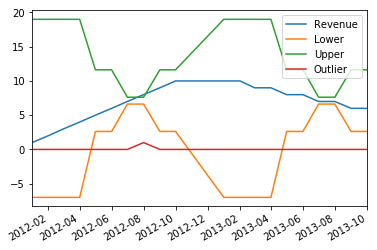

In [10]:
newdf.plot()